# Mixture of Gaussians

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Mixture of Gaussians (aka Expectation Maximation) is a clustering method. The idea of this model is simpel: for a given dataset, each point is generated by linearly combining multiple multivariate Gaussians.

## What are Gaussians?

A Gaussian is a function of the form:

\begin{equation*}
f(x)=a e^{-\frac{(x-b)^2}{2c^2}}
\end{equation*}

where
- $a\in \mathbb{R}$ is the height of the curve's peak 
- $b \in \mathbb{R}$ is the position of center of the peak,
- $c \in \mathbb{R}$ is the [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation "The standard deviation σ is a measure that is used to quantify the amount of variation or dispersion of a set of data values") which controls the width of the bell

The function is mathematically convenient that is often used to describe a dataset that typically has the normal [distribution](https://en.wikipedia.org/wiki/Frequency_distribution "A distribution is a listing of outcomes of an experiment and the probability associated with each outcome."). Its plot shape is called a bell curve.

A univariate Gaussian can be represented by two variables ($\mu$ and $\sigma$) when it represents the probability density function:

\begin{equation*}
f(x)=\frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(x-\mu)^2}{2 \sigma^2}}
\end{equation*}

where

- $\mu$ is the mean of all data points. This specifies the center of the curve
- $\sigma$ is the standard deviation. This describe the "spread" of the data

Here are some plots of the univarite Guassian distribution for various parameters of $\mu$ and $\sigma$:

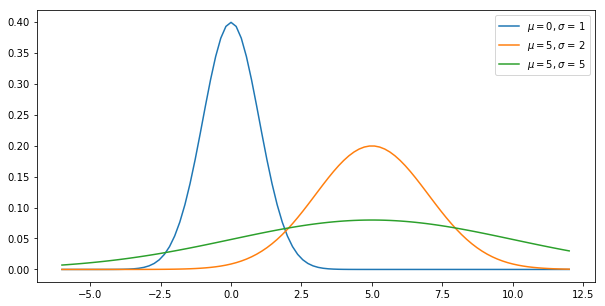

In [22]:
X = np.linspace(-6, 12, 100)

def gaussian(X, mu, sigma):
    a = 1 / (sigma * np.sqrt(2 * np.pi)) 
    return a * np.exp(-np.power(X - mu, 2.) / (2 * sigma * sigma))

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(X, gaussian(X, mu=0, sigma=1), label='$\mu = 0, \sigma$ = 1')
ax.plot(X, gaussian(X, mu=5, sigma=2), label='$\mu = 5, \sigma$ = 2')
ax.plot(X, gaussian(X, mu=5, sigma=5), label='$\mu = 5, \sigma$ = 5')
plt.legend()

The Gaussian distribution for a vector $x$ with $d$ dimensions (multivariate Gaussian) is defined as follows:

\begin{equation*}
f(x \mid \mu, \Sigma) = \frac{1}{ \sqrt{(2 \pi)^d |\Sigma|} } exp\left( -\frac{1}{2} (x-\mu)^T \Sigma^{-1} (x-m) \right)
\end{equation*}

where

- $d$ -- number of dimensions in the vector $x$
- $\mu$ -- the mean
- $\Sigma$ -- the covariance matrix

We can also plot 2D Gaussian distribution:

![](images/2d-gaussian-distribution.png)

Source: Wikimedia

## Variance-Covariance Matrix

Before we look at Gaussian Mixture Model, let us first try to understand what the variance-covariance matrix is. 

Covariance is a measure how changes in one variable are associated with changes in a second variables and tells us how two variables behave as a pair. In other words, covariance is a measure of the linear relationship between two variables. We are only interested in the sign of a covariance value:
- A positive value indicates a direct or increase linear relationship
- A negative value indicates a decreasing relationship
- Zero (or around zero) indicates that there is probably not a linear relationship between the two variables

We are not interested in the number itself since covariance does not tells us anything about the strength of the relationship. To find the strength of the relationship, we need to find the correlation.


Variance and covariance are often displayed together in a **variance-covariance** matrix aka a covariance matrix. The diagonal of covariance matrix provides the variance of each individual variable, whereas the off-diagonal entries provide the covariance between each pair of variables.

## Gaussian Mixture Model (GMM)

In GMM, we assume that each cluster $C_i$ is characterised by a multivariate normal distribution. Now, we can design a density function $f_i(x)$ which can tell us what is the probability that a data point $x$ (a vector with $d$ elements) belongs to the cluster $C_i$:

\begin{equation*}
f_i(x) = f(x \mid \mu_i, \Sigma_i) = \frac{1}{ \sqrt{(2 \pi)^d |\Sigma_i|} } exp\left( -\frac{1}{2} (x-\mu_i)^T \Sigma_i^{-1} (x-m_i) \right)
\end{equation*}

where

- $d$ -- number of dimensions
- $\mu_i$ -- the mean of the cluster $C_i$
- $\Sigma_i$ -- the covariance matrix for the cluster $C_i$

Before we can define the function, we need to learn the unknown parameters $\mu_i$ and $\Sigma_i$.

**Our problem is as follows:**

Give a dataset $X={x_1, x_2, \cdots, x_N}$ drawn from an unknown distribution (assume it is a multiple Gaussians distribution), estimate the parameters $\theta$ of the GMM that fits the data.

To find the parameters $\theta$, we

Maximise the likelihood $p(X \mid \theta)$ of the data with regard to the model parameters